pip install -r requirements.txt


%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install numpy
%pip install scikit-learn

Loading the Dataset

In [2]:

import pandas as pd


# Then load your data
file_path = 'mldata.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,yes,no,information security,testing,poor,poor,programming,testing,BPA,no,Series,Management,smart worker,yes,no,Applications Developer
1,7,6,4,3,no,yes,shell programming,testing,excellent,medium,Management,system developer,Cloud Services,yes,Autobiographies,Technical,hard worker,no,yes,Applications Developer
2,2,3,9,1,no,yes,information security,testing,excellent,poor,data engineering,Business process analyst,product development,yes,Travel,Technical,smart worker,no,no,Applications Developer
3,2,6,3,5,no,yes,r programming,database security,excellent,poor,networks,testing,Testing and Maintainance Services,yes,Guide,Management,smart worker,yes,yes,Applications Developer
4,2,0,3,4,yes,no,distro making,game development,excellent,medium,Software Engineering,system developer,BPA,no,Health,Technical,hard worker,yes,no,Applications Developer


In [4]:
# Get the shape of the DataFrame
shape = data.shape

# Print the shape
print("The shape of the dataset is:", shape)


The shape of the dataset is: (6901, 20)


Data Preprocessing

In [5]:
data.columns

Index(['Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'self-learning capability?',
       'Extra-courses did', 'certifications', 'workshops',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Interested Type of Books',
       'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
       'Introvert', 'Suggested Job Role'],
      dtype='object')

In [6]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical features:")
print(numerical_cols)



Numerical features:
Index(['Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points'],
      dtype='object')


In [7]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("\nCategorical features:")
print(categorical_cols)


Categorical features:
Index(['self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Interested Type of Books',
       'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
       'Introvert', 'Suggested Job Role'],
      dtype='object')


In [8]:
# Checking if there are any missing values in our dataset
missing_values = data.isnull().values.any()

print("Is there any missing value in the DataSet?", missing_values)

data.isnull().sum(axis=0)


Is there any missing value in the DataSet? False


,0
Logical quotient rating,0
hackathons,0
coding skills rating,0
public speaking points,0
self-learning capability?,0
Extra-courses did,0
certifications,0
workshops,0
reading and writing skills,0
memory capability score,0


In [9]:
# Checking for unique/distinct values in categorical features in the data

categorical_features = ['self-learning capability?', 'Extra-courses did', 'certifications', 'workshops',
                        'reading and writing skills', 'memory capability score', 'Interested subjects',
                        'interested career area ', 'Type of company want to settle in?',
                        'Taken inputs from seniors or elders', 'Interested Type of Books',
                        'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
                        'Introvert', 'Suggested Job Role']

for feature in categorical_features:
    print(f"Unique values in '{feature}':")
    print(data[feature].value_counts())
    print("\n")  # Add spacing between each feature's output

Unique values in 'self-learning capability?':
self-learning capability?
yes    3496
no     3405
Name: count, dtype: int64


Unique values in 'Extra-courses did':
Extra-courses did
no     3529
yes    3372
Name: count, dtype: int64


Unique values in 'certifications':
certifications
r programming           803
information security    785
shell programming       783
machine learning        783
full stack              768
hadoop                  764
python                  756
distro making           740
app development         719
Name: count, dtype: int64


Unique values in 'workshops':
workshops
database security    897
system designing     891
web technologies     891
hacking              867
testing              852
data science         842
game development     831
cloud computing      830
Name: count, dtype: int64


Unique values in 'reading and writing skills':
reading and writing skills
excellent    2328
medium       2315
poor         2258
Name: count, dtype: int64


Unique values 

In [10]:
# Now lets find out the summary of numerical features

print(data[['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']].describe())


       Logical quotient rating   hackathons  coding skills rating  \
count              6901.000000  6901.000000           6901.000000   
mean                  4.991016     2.999710              5.010723   
std                   2.577704     2.010191              2.568347   
min                   1.000000     0.000000              1.000000   
25%                   3.000000     1.000000              3.000000   
50%                   5.000000     3.000000              5.000000   
75%                   7.000000     5.000000              7.000000   
max                   9.000000     6.000000              9.000000   

       public speaking points  
count             6901.000000  
mean                 4.988263  
std                  2.599500  
min                  1.000000  
25%                  3.000000  
50%                  5.000000  
75%                  7.000000  
max                  9.000000  


Exploratory Data Analysis

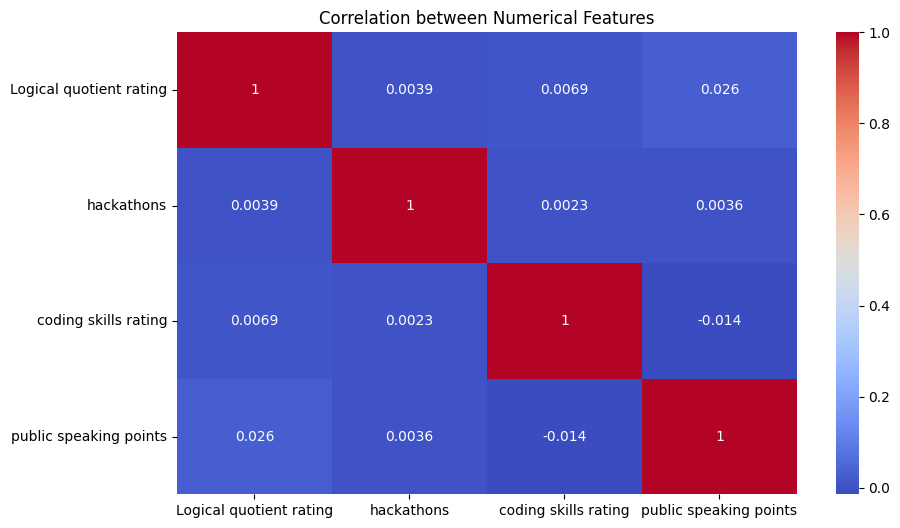

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Features')
plt.show()


After looking at the above heatmap we found out that there is no highly correlated numerical pair.

FEATURE ENGINEERING

A) Binary Encoding
["self-learning capability?", "Extra-courses did","Taken inputs from seniors or elders", "worked in teams ever?", "Introvert"] these columns have yes or no, so we will use binary encoding.


In [12]:
cols = data[["self-learning capability?", "Extra-courses did","Taken inputs from seniors or elders", "worked in teams ever?", "Introvert"]]
for i in cols:
    cleanup_nums = {i: {"yes": 1, "no": 0}}
    data = data.replace(cleanup_nums)

<ipython-input-12-d9ca105c0eac>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(cleanup_nums)


In [13]:
print("\n\nList of Categorical features: \n" , data.select_dtypes(include=['object']).columns.tolist())




List of Categorical features: 
 ['certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'Suggested Job Role']


B) Number Encoding

In [14]:
mycol = data[["reading and writing skills", "memory capability score"]]
for i in mycol:
    cleanup_nums = {i: {"poor": 0, "medium": 1, "excellent": 2}}
    data = data.replace(cleanup_nums)

category_cols = data[['certifications', 'workshops', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?',
                    'Interested Type of Books']]
for i in category_cols:
    data[i] = data[i].astype('category')
    data[i + "_code"] = data[i].cat.codes

print("\n\nList of Categorical features: \n" , data.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['Management or Technical', 'hard/smart worker', 'Suggested Job Role']


<ipython-input-14-f646ce18cacb>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(cleanup_nums)


C) Dummy Variable Encoding

In [15]:
print(data['Management or Technical'].unique())
print(data['hard/smart worker'].unique())

['Management' 'Technical']
['smart worker' 'hard worker']


In [16]:
data = pd.get_dummies(data, columns=["Management or Technical", "hard/smart worker"], prefix=["A", "B"], dtype = int)
data.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,...,certifications_code,workshops_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Interested Type of Books_code,A_Management,A_Technical,B_hard worker,B_smart worker
0,5,0,6,2,1,0,information security,testing,0,0,...,4,6,9,5,0,28,1,0,0,1
1,7,6,4,3,0,1,shell programming,testing,2,1,...,8,6,2,4,1,3,0,1,1,0
2,2,3,9,1,0,1,information security,testing,2,0,...,4,6,5,0,9,29,0,1,0,1
3,2,6,3,5,0,1,r programming,database security,2,0,...,7,2,7,5,7,13,1,0,0,1
4,2,0,3,4,1,0,distro making,game development,2,1,...,1,3,3,4,0,14,0,1,1,0


In [17]:
import numpy as np

print("List of Numerical features: \n" , data.select_dtypes(include=np.number).columns.tolist())

List of Numerical features: 
 ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'self-learning capability?', 'Extra-courses did', 'reading and writing skills', 'memory capability score', 'Taken inputs from seniors or elders', 'worked in teams ever?', 'Introvert', 'certifications_code', 'workshops_code', 'Interested subjects_code', 'interested career area _code', 'Type of company want to settle in?_code', 'Interested Type of Books_code', 'A_Management', 'A_Technical', 'B_hard worker', 'B_smart worker']


In [18]:
print(data['Suggested Job Role'].unique())

['Applications Developer' 'CRM Technical Developer' 'Database Developer'
 'Mobile Applications Developer' 'Network Security Engineer'
 'Software Developer' 'Software Engineer'
 'Software Quality Assurance (QA) / Testing'
 'Systems Security Administrator' 'Technical Support' 'UX Designer'
 'Web Developer']


In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Suggested Job Role_code'] = label_encoder.fit_transform(data['Suggested Job Role'])

Train and Test Split

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler


feed = data[['Logical quotient rating', 'coding skills rating', 'hackathons', 'public speaking points', 'self-learning capability?','Extra-courses did',
           'Taken inputs from seniors or elders', 'worked in teams ever?', 'Introvert', 'reading and writing skills', 'memory capability score',
           'B_hard worker', 'B_smart worker', 'A_Management', 'A_Technical', 'Interested subjects_code', 'Interested Type of Books_code', 'certifications_code',
           'workshops_code', 'Type of company want to settle in?_code',  'interested career area _code',
             'Suggested Job Role']]

# Taking all independent variable columns
data_train_x = data[feed.columns[:-1]]

# Target variable column
data_train_y = data['Suggested Job Role_code']

x_train, x_test, y_train, y_test = train_test_split(data_train_x, data_train_y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Box plot and Heat map of the numerical features

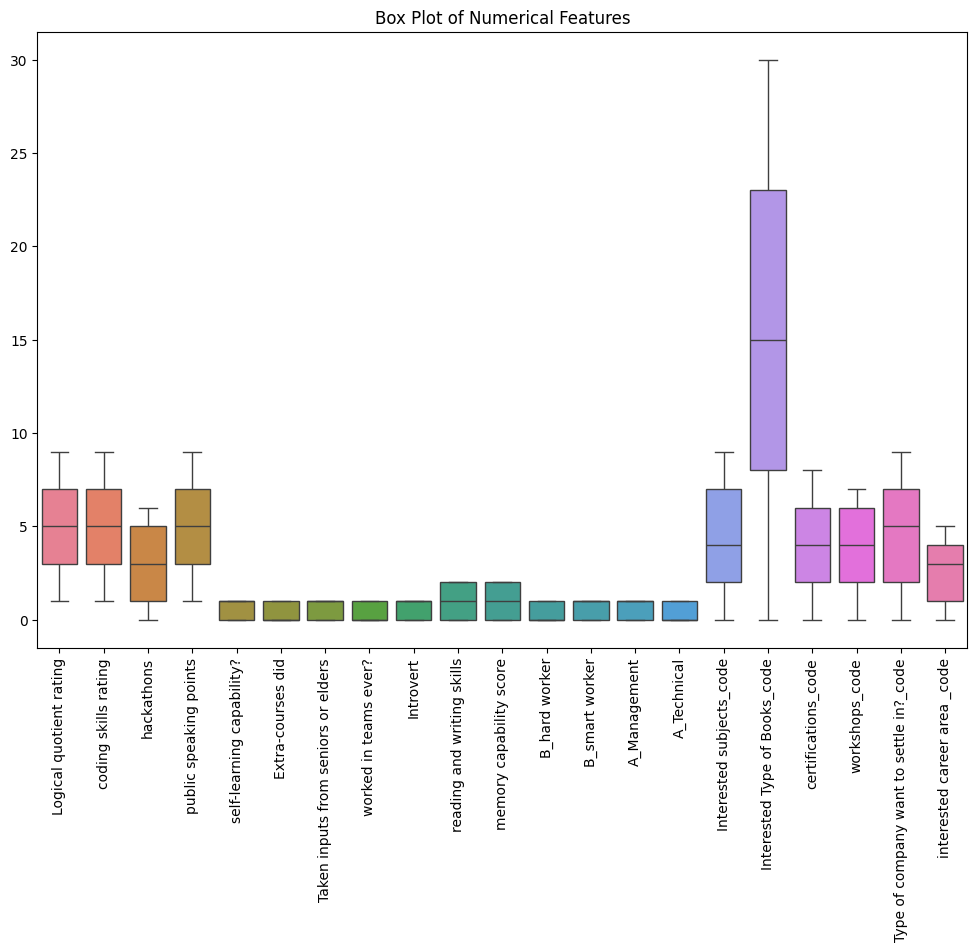

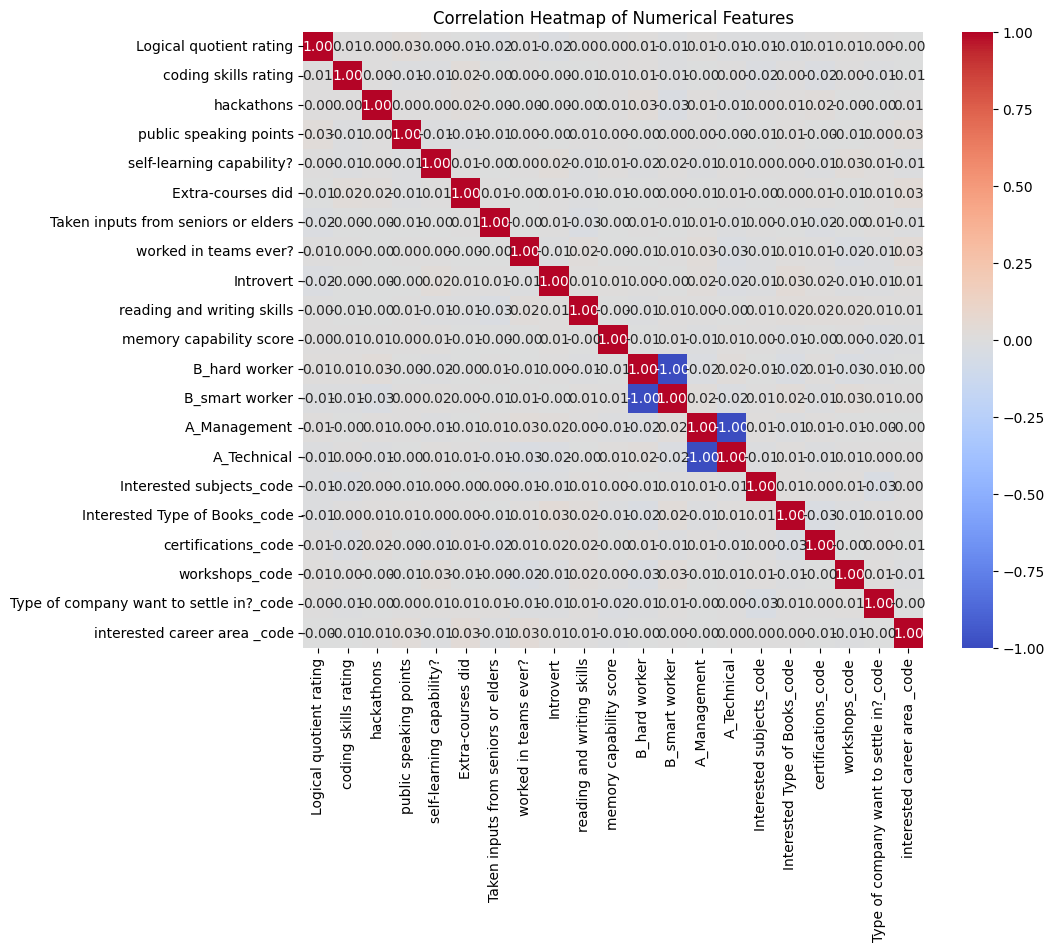

In [21]:
numerical_feed = feed.select_dtypes(include=[np.number])

# Plotting boxplots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_feed)
plt.xticks(rotation=90)  # Rotate labels for better readability if there are many columns
plt.title('Box Plot of Numerical Features')
plt.show()

# Plotting correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_feed.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Gradient Boosting Model


In [23]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import csv

class GradientBoostingTreeRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state

    def _initialize_f0(self, y):
        return np.mean(y)

    def _negative_gradient(self, y, pred):
        return y - pred

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)

        self.f0 = self._initialize_f0(y)
        self.trees_ = []

        F = np.full(len(y), self.f0)
        np.random.seed(self.random_state)

        # Early stopping variables
        best_mse = float('inf')
        patience = 500
        patience_counter = 0

        for m in range(self.n_estimators):
            residuals = self._negative_gradient(y, F)

            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                random_state=self.random_state
            )

            tree.fit(X, residuals)
            update = self.learning_rate * tree.predict(X)
            F += update
            self.trees_.append(tree)

            # Early stopping check
            current_mse = mean_squared_error(y, F)
            if current_mse < best_mse:
                best_mse = current_mse
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"Early stopping at iteration {m}")
                break

        return self

    def predict(self, X):
        X = np.asarray(X)
        pred = np.full(len(X), self.f0)
        for tree in self.trees_:
            pred += self.learning_rate * tree.predict(X)
        return pred

def load_data(filename):
    import csv
    import numpy as np
    from sklearn.preprocessing import LabelEncoder

    with open(filename, 'r') as f:
        reader = csv.reader(f)
        # Skip header if it exists
        # next(reader)  # Uncomment if you have headers

        # Initialize label encoders for categorical columns
        categorical_encoders = {}
        X, y = [], []

        for row in reader:
            features = []
            for i, val in enumerate(row[:-1]):  # All columns except the last
                try:
                    # Try converting to float first
                    features.append(float(val))
                except ValueError:
                    # If conversion fails, it's categorical data
                    if i not in categorical_encoders:
                        categorical_encoders[i] = LabelEncoder()
                    # Fit and transform the categorical value
                    encoded_val = categorical_encoders[i].fit_transform([val])[0]
                    features.append(encoded_val)

            # Handle target variable (last column)
            try:
                y_val = float(row[-1])
            except ValueError:
                if 'target_encoder' not in categorical_encoders:
                    categorical_encoders['target_encoder'] = LabelEncoder()
                y_val = categorical_encoders['target_encoder'].fit_transform([row[-1]])[0]

            X.append(features)
            y.append(y_val)

        return np.array(X), np.array(y)

def test_model(filename):
    # Load data
    X, y = load_data(filename)

    # Scale target values to [0,1]
    scaler = MinMaxScaler()
    y_scaled = scaler.fit_transform(y.reshape(-1, 1)).ravel()

    # Initialize and train model
    model = GradientBoostingTreeRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )

    # Fit the model
    model.fit(X, y_scaled)

    # Make predictions
    predictions_scaled = model.predict(X)
    predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).ravel()

    # Calculate metrics
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)

    print("Gradient Boosting Results:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

    return predictions, y

if __name__ == "__main__":
    predictions, actuals = test_model('mldata.csv')

Gradient Boosting Results:
Mean Squared Error: 0.0000
R² Score: 1.0000


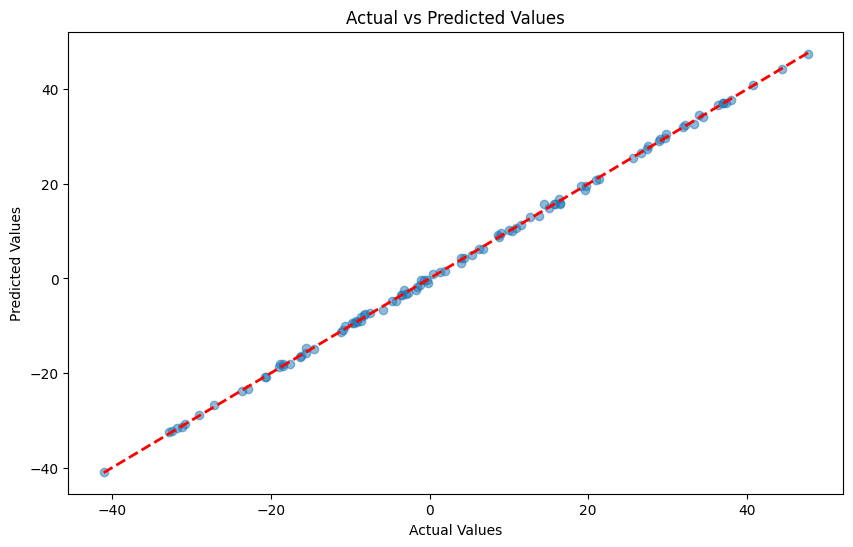

Mean Squared Error: 0.17391991814454602
R² Score: 0.9995915735916483


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None):

        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state

        # Storage for trees and initial prediction
        self.trees = []
        self.base_prediction = None

    def fit(self, X, y):

        # Set random seed for reproducibility
        np.random.seed(self.random_state)

        # Initial prediction is mean of target values
        self.base_prediction = np.mean(y)

        # Initialize predictions with base prediction
        current_pred = np.full(len(y), self.base_prediction)

        # Iteratively build trees to minimize residuals
        for _ in range(self.n_estimators):
            # Compute negative gradient (residuals)
            residuals = y - current_pred

            # Fit regression tree to residuals
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                random_state=self.random_state
            )
            tree.fit(X, residuals)

            # Update predictions with learning rate scaled tree prediction
            current_pred += self.learning_rate * tree.predict(X)

            # Store the tree
            self.trees.append(tree)

        return self

    def predict(self, X):

        # Start with base prediction
        predictions = np.full(len(X), self.base_prediction)

        # Add learning-rate scaled predictions from each tree
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)

        return predictions

def load_data(filename):
    data = np.loadtxt(filename, delimiter=',', skiprows=1)
    X = data[:, :-1]
    y = data[:, -1]
    return X, y

def evaluate_model(X, y, model):
    """Evaluate model performance"""
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)

    plt.figure(figsize=(10, 6))
    plt.scatter(y, predictions, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")

    return predictions

def main():
    # Load and scale data
    X, y = load_data('data.csv')
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize and fit gradient boosting model
    gb_model = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
    gb_model.fit(X_scaled, y)

    # Evaluate model
    predictions = evaluate_model(X_scaled, y, gb_model)

if __name__ == "__main__":
    main()